In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pypalettes import load_cmap
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch
import cartopy
import cartopy.crs as ccrs
import geoplot
import geoplot.crs as gcrs
from matplotlib import font_manager
from matplotlib.font_manager import FontProperties

# projection
proj = ccrs.Mercator()

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/R-graph-gallery/master/DATA/world.geojson"
world = gpd.read_file(url)
world = world[~world['name'].isin(["Antarctica"])]
world = world.to_crs(proj.proj4_init)
df = pd.read_csv('data.csv')

def convert_lat_long(coord):
   try:
      if coord[-1] == 'N':
         return float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
      elif coord[-1] == 'S':
         return -float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
      elif coord[-1] == 'E':
         return float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", ".").replace(":", "."))
      elif coord[-1] == 'W':
         return -float(coord[:-2].replace(" ", "").replace("..", ".").replace("`", "").replace(",", "."))
   except:
      print(coord)
      return None
df['Latitude'] = df['Latitude'].apply(convert_lat_long)
df['Longitude'] = df['Longitude'].apply(convert_lat_long)

df = df[df['Latitude'].abs() <= 90]
df = df[df['Longitude'].abs() <= 180]
df = df[df['Magnitude'] <= 10]

def get_year(date):
   return date[-4:]
df['year'] = df['Date'].apply(get_year).astype(float)

df.sample(10)

2.7.37 N


,Date,Time (utc),Region,Magnitude,Depth (km),Latitude,Longitude,Mode,Map,year
11981,26/07/2017,04:26:32,Eastern Kashmir,4.0,35,34.80,76.90,M,-,2017.0
2510,18/11/2023,14:46:57,84 KM Northwest of Gilgit,3.3,45,36.28,73.48,M,-,2023.0
9195,27/10/2018,00:43:22,"Hindu Kush Region, Afghanistan",3.2,200,36.84,71.01,M,-,2018.0
4838,11/03/2021,11:06:02,"Hindu Kush Region, Afghanistan",4.3,200,36.64,70.28,M,-,2021.0
5887,14/11/2019,22:25:53,Northern Molucca Sea,4.7,10,1.28,126.42,A,-,2019.0
5258,12/08/2020,22:40:46,67km NW of Khuzdar,5.2,17,27.98,65.95,M,-,2020.0
167,03/06/2024,16:45:57,Kashmir-Xinjiang Border Region,4.7,142,36.77,76.63,M,-,2024.0
14019,23/09/2016,08:59:36,"Fox Island, Aleutian Island",5.3,59,55.10,-165.10,A,-,2016.0
7728,30/03/2019,22:44:25,Southern Iran,4.9,10,28.49,51.69,A,-,2019.0
801,06/04/2024,09:23:32,Kashmir-India Border Region,4.2,35,33.46,76.13,A,-,2024.0


In [17]:
def draw_arrow(tail_position, head_position, invert=False, radius=0.5, color='black', fig=None):
   if fig is None:
      fig = plt.gcf()
   kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color=color, lw=0.5)
   if invert:
      connectionstyle = f"arc3,rad=-{radius}"
   else:
      connectionstyle = f"arc3,rad={radius}"
   a = FancyArrowPatch(
      tail_position, head_position,
      connectionstyle=connectionstyle,
      transform=fig.transFigure,
      **kw
   )
   fig.patches.append(a)

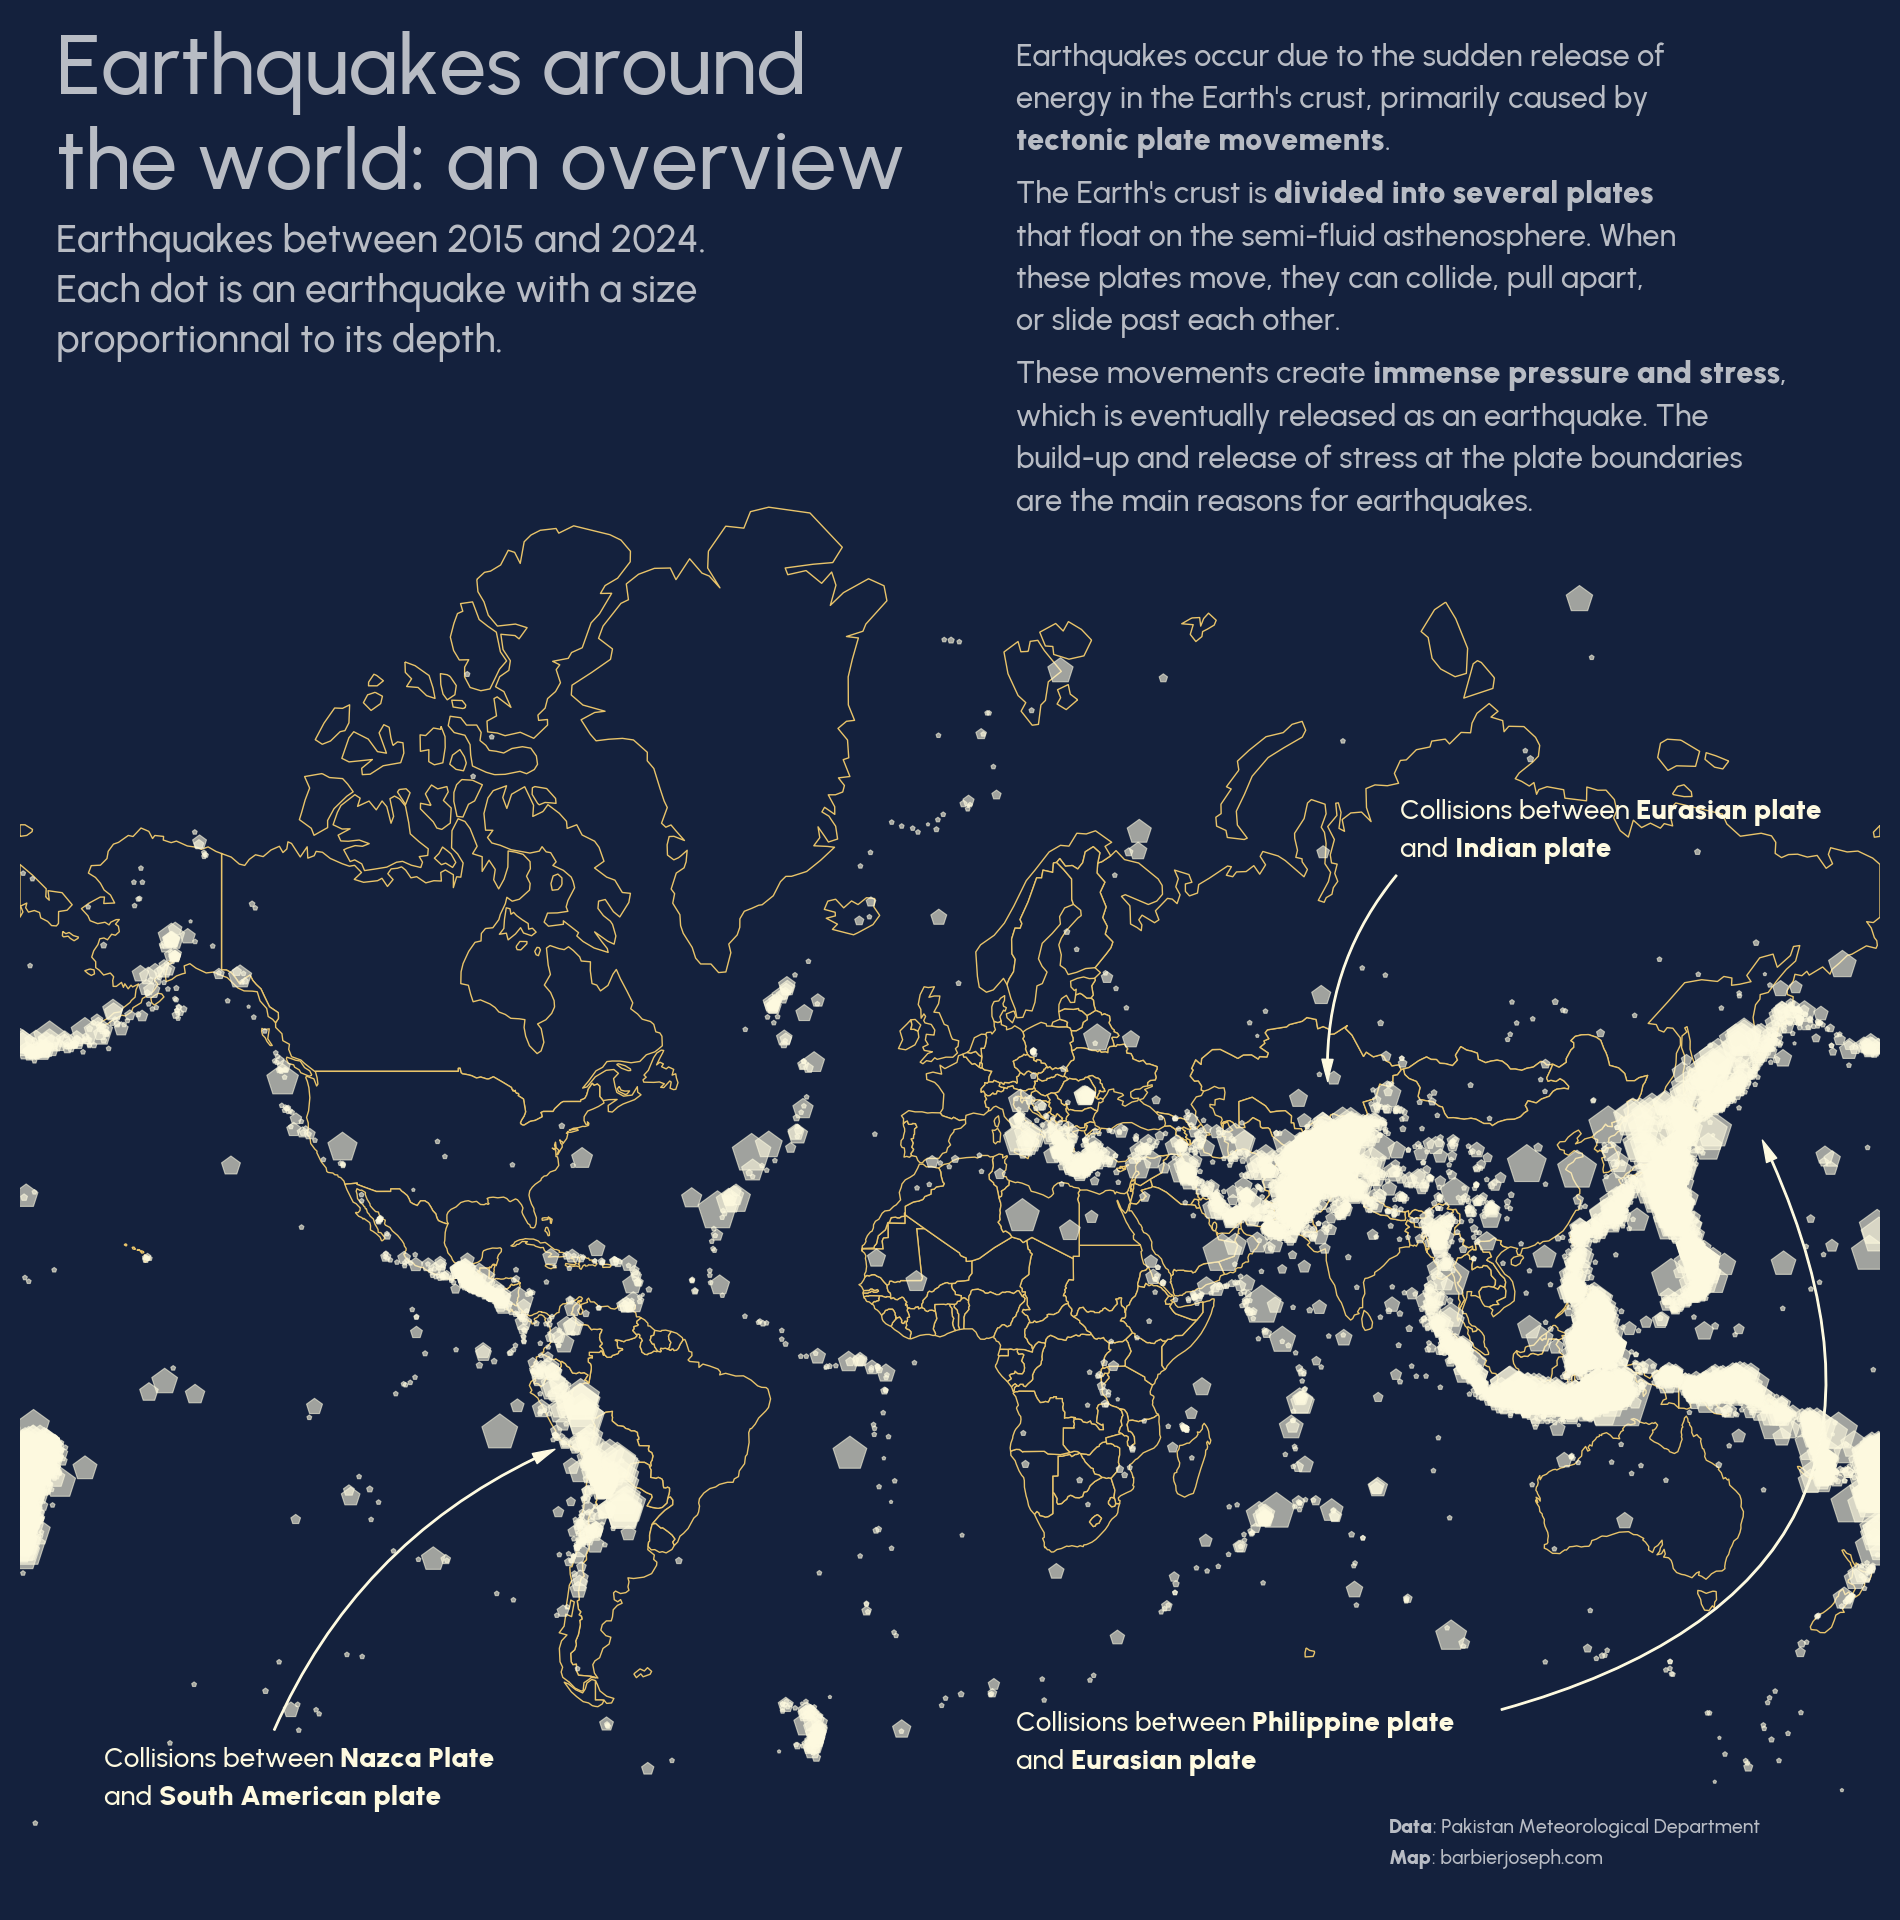

In [117]:
# !!! change it to your path
personal_path = '/Users/josephbarbier/Library/Fonts/'
font_path = personal_path + 'Urbanist-Medium.ttf'
font = FontProperties(fname=font_path)
font_path = personal_path + 'Urbanist-Black.ttf'
bold_font = FontProperties(fname=font_path)

# colors
background_color = '#14213d'
map_color = '#e9c46a'
map_edgecolor = 'black'
text_color = 'white'
bubble_color = '#fefae0'
alpha_text = 0.7
cmap = load_cmap("Esox_lucius", type='continuous')

# initialize the figure
fig, ax = plt.subplots(figsize=(12, 12), dpi=200, subplot_kw={'projection':proj})
fig.set_facecolor(background_color)
ax.set_facecolor(background_color)
ax.set_axis_off()

# background map
world.boundary.plot(ax=ax, edgecolor=map_color, linewidth=0.5, facecolor=background_color)

# transform the coordinates to the projection's CRS
pc = ccrs.PlateCarree()
moll_coords = proj.transform_points(pc, df['Longitude'].values, df['Latitude'].values)

# bubble on top of the map
ax.scatter(
   moll_coords[:, 0], moll_coords[:, 1],
   s=df['Depth (km)']/3,
   marker='p',
   color=bubble_color,
   linewidth=0.4,
   alpha=0.6,
   zorder=10,
)

# title
fig_text(
   x=0.14, y=0.98, s='Earthquakes around\nthe world: an overview',
   color=text_color, fontsize=30, ha='left', va='top', font=font,
   alpha=alpha_text
)

# subtitle
fig_text(
   x=0.14, y=0.9, s='Earthquakes between 2015 and 2024.\nEach dot is an earthquake with a size\nproportionnal to its depth.',
   color=text_color, fontsize=14, ha='left', va='top', font=font, alpha=alpha_text
)

# description
text = """
Earthquakes occur due to the sudden release of
energy in the Earth's crust, primarily caused by
<tectonic plate movements>.\n
The Earth's crust is <divided into several plates>
that float on the semi-fluid asthenosphere. When
these plates move, they can collide, pull apart,
or slide past each other.\n
These movements create <immense pressure and stress>,
which is eventually released as an earthquake. The
build-up and release of stress at the plate boundaries
are the main reasons for earthquakes.
"""
fig_text(
   x=0.54, y=0.98, s=text, highlight_textprops=[{'font': bold_font},{'font': bold_font},{'font': bold_font}],
   color=text_color, fontsize=11, ha='left', va='top', font=font, alpha=alpha_text
)

# credit
text = """
<Data>: Pakistan Meteorological Department
<Map>: barbierjoseph.com
"""
fig_text(
   x=0.85, y=0.24, s=text, color=text_color, fontsize=7, ha='right', va='top',
   font=font, highlight_textprops=[{'font': bold_font}, {'font': bold_font}],
   alpha=alpha_text
)

# nazaca plate
draw_arrow((0.23, 0.27), (0.35, 0.39), fig=fig, color=bubble_color, invert=True, radius=0.2)
fig_text(x=0.16, y=0.265, s='Collisions between <Nazca Plate>\nand <South American plate>', fontsize=10, color=bubble_color, font=font, highlight_textprops=[{'font': bold_font},{'font': bold_font}])

# india plate
draw_arrow((0.70, 0.63), (0.67, 0.54), fig=fig, color=bubble_color, radius=0.2)
fig_text(x=0.7, y=0.66, s='Collisions between <Eurasian plate>\nand <Indian plate>', fontsize=10, color=bubble_color, font=font, highlight_textprops=[{'font': bold_font},{'font': bold_font}])

# pacific plate
draw_arrow((0.74, 0.28), (0.85, 0.52), fig=fig, color=bubble_color, radius=0.6)
fig_text(x=0.54, y=0.28, s='Collisions between <Philippine plate>\nand <Eurasian plate>', fontsize=10, color=bubble_color, font=font, highlight_textprops=[{'font': bold_font},{'font': bold_font}])

plt.savefig('map.png', dpi=300, bbox_inches="tight")
plt.show()